In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

In [4]:
names,name2feat = get_name2feat()
print len(names)
print len(name2feat.keys())

25888
25882


In [3]:
def get_name2feat():
    names = np.load('train_filename.npy').tolist()
    feats = np.load('train_feature_ap.npy')
    name2feat={}
    for i,name in enumerate(names):
        name2feat[name]=feats[i]
    return names,name2feat

## 随机选择一些可视化

In [5]:
np.random.shuffle(names)
select = names[:500]
feats = np.array([name2feat[n] for n in select])
print len(select)
print feats.shape

500
(500, 512)


In [6]:
tsne = TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(feats)

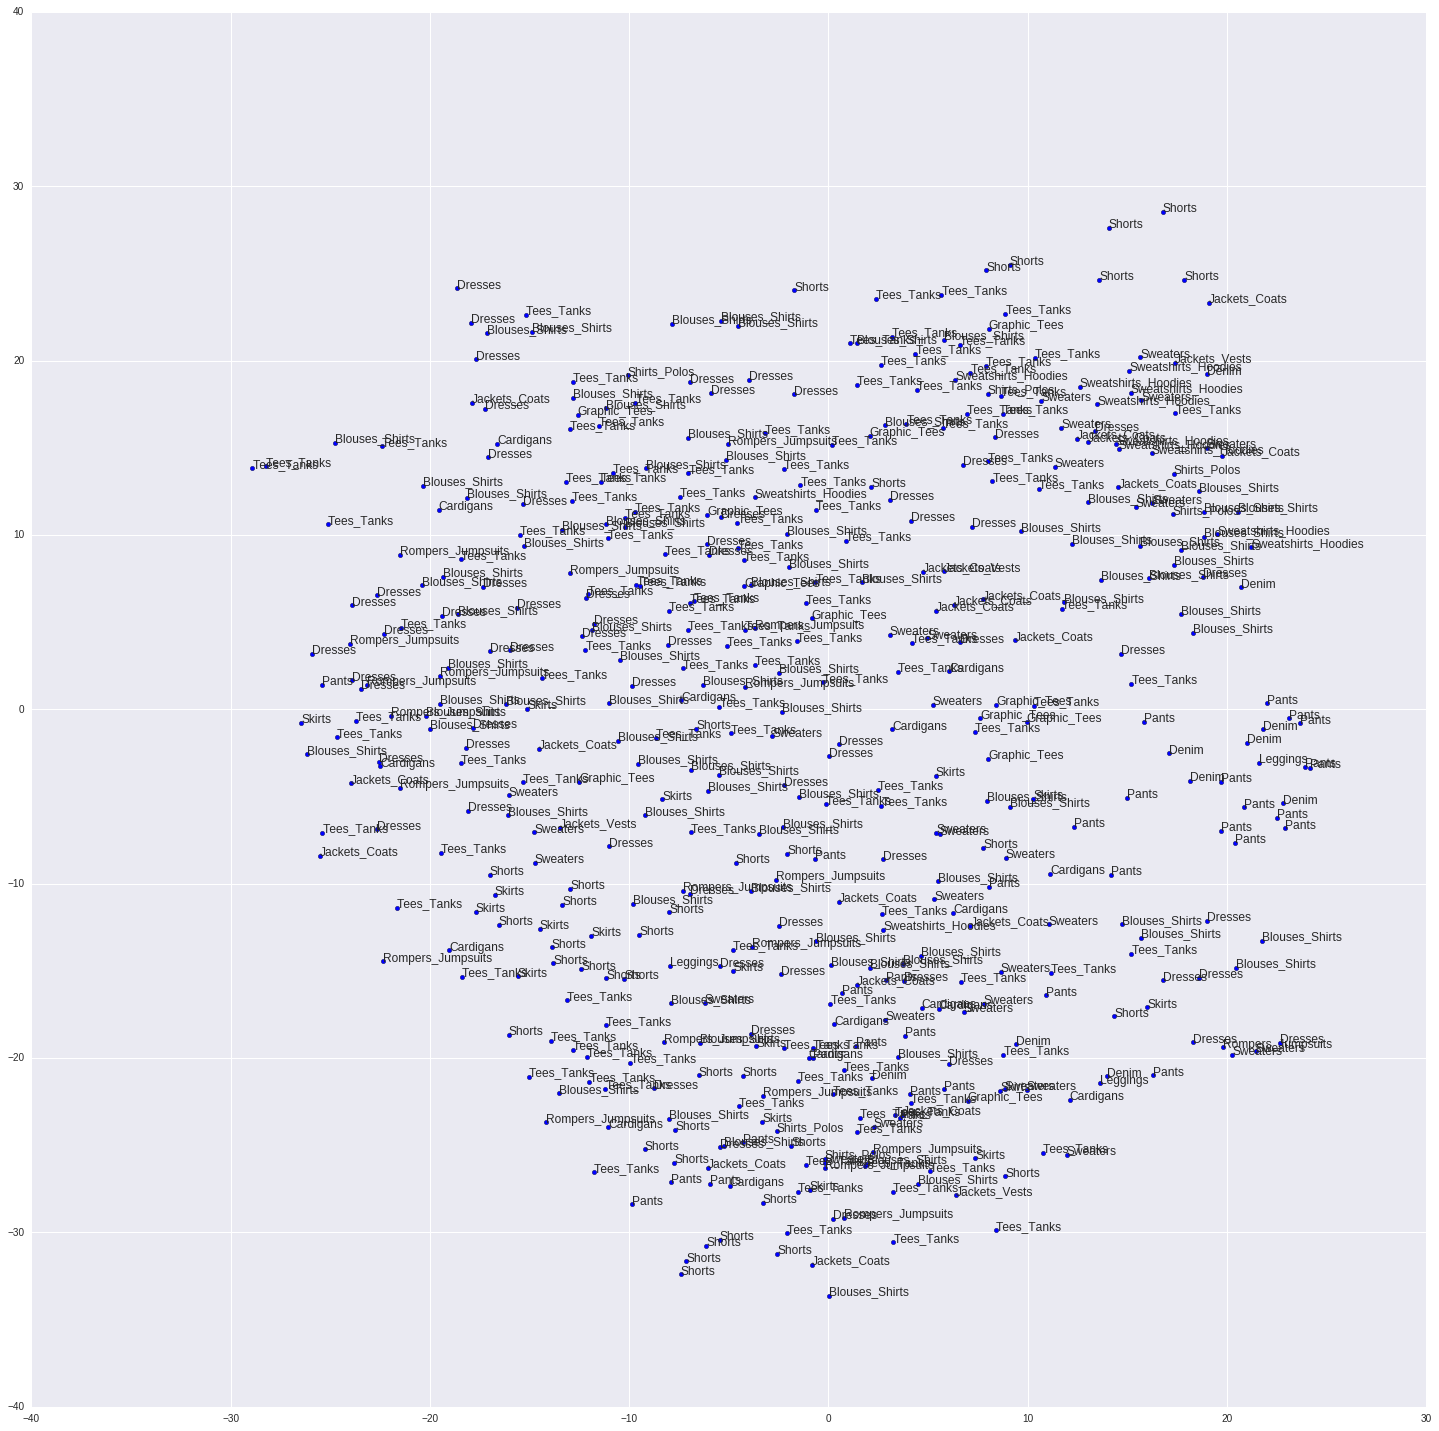

In [7]:
plt.figure(figsize=(25,25))
plt.scatter(Y[:, 0], Y[:, 1])
for line, x, y in zip(select, Y[:, 0], Y[:, 1]):
    label = line.split('/')[-3]
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

## 根据每个Item tsne[共3997item]

In [5]:
print len(names)
print len(name2feat.keys())

25888
25882


In [8]:
names[1].split('/')

['img', 'WOMEN', 'Shorts', 'id_00005838', '04_7_additional.jpg']

In [9]:
# item 2 names
Item={}
for name in names:
    idx = name.split('/')[-2]
    if idx not in Item:
        Item[idx]=[]
    Item[idx].append(name)

In [7]:
print len(Item.keys())
print Item.keys()[2]

3997
id_00006364


In [10]:
def get_mean(item_names):
    return np.mean([name2feat[n] for n in item_names],axis=0)

In [11]:
# item 2 vector
vector={}
for item in Item:
    vector[item]=get_mean(Item[item])
print len(vector.keys())

3997


In [39]:
set(vector.keys())==set(Item.keys())

True

### 3997 Item,vector[t-SNE]

In [28]:
all_items = Item.keys()
np.random.shuffle(all_items)
select_items = all_items[:100]
select_feats = np.array([vector[n] for n in select_items])
print len(select_items)
print select_feats.shape

100
(100, 512)


In [29]:
tsne = TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(select_feats)

## 用类别代表颜色

In [30]:
labels = []
for item in select_items:
    #import pdb
    #pdb.set_trace()
    label = Item[item][0].split('/')[-3]
    labels.append(label)
labels = set(labels)
print len(labels)

14


In [31]:
#这个东西真操蛋
label2color=dict(zip(list(labels),list(range(14))))

## 这很正常呀，还没有聚类，并不是很明显

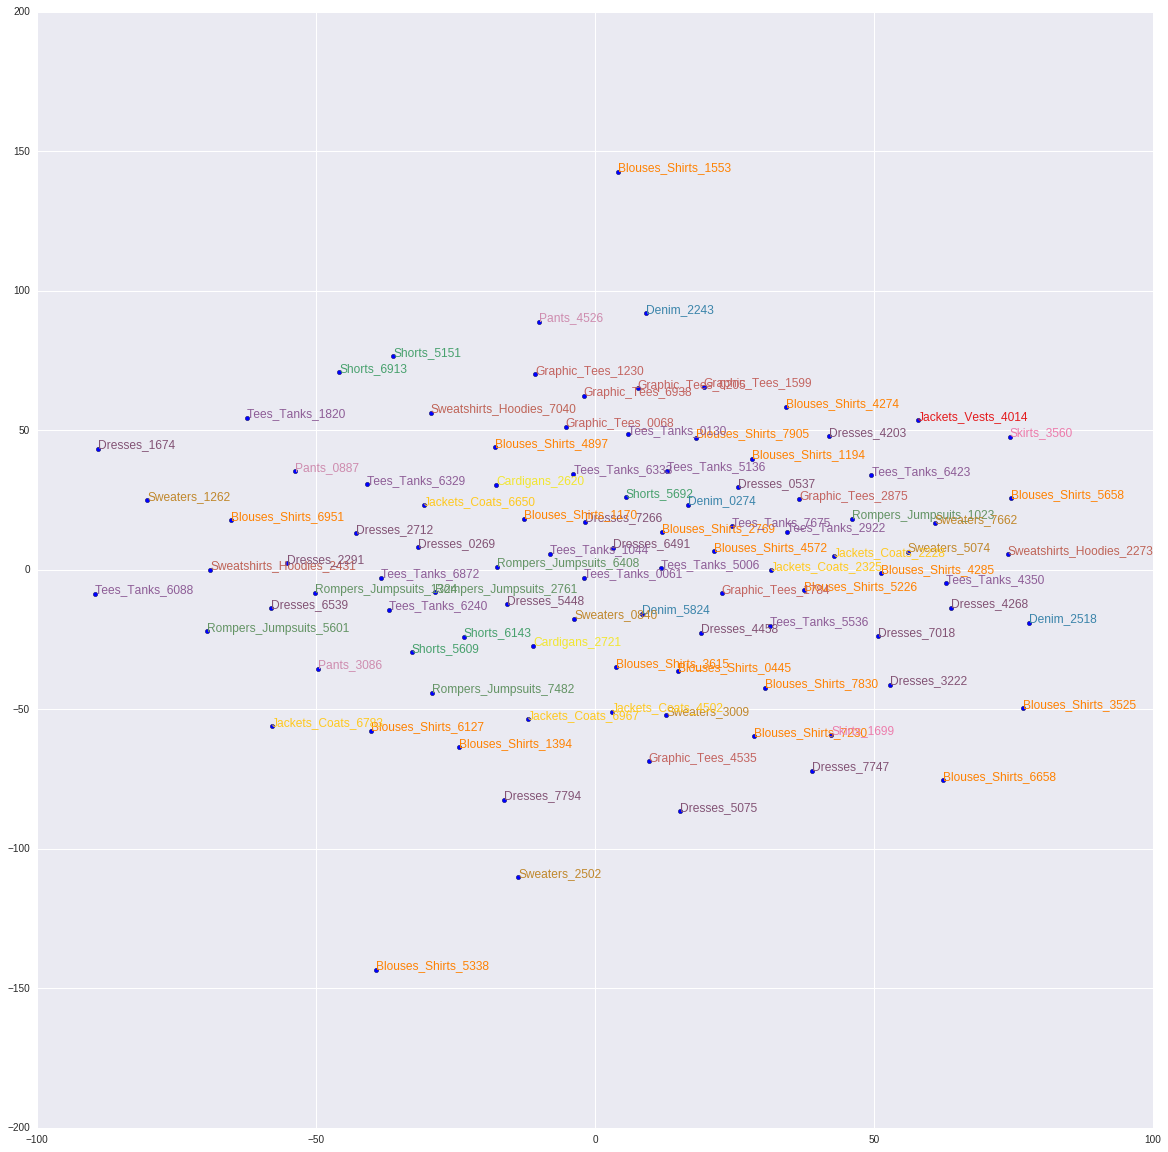

In [33]:
plt.figure(figsize=(20,20))
plt.scatter(Y[:, 0], Y[:, 1])
for line, x, y in zip(select_items, Y[:, 0], Y[:, 1]):
    label = Item[line][0].split('/')[-3]
    label1=line[-4:]
    plt.annotate(label+'_'+label1, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                 color=plt.cm.Set1(label2color[label]/14.))

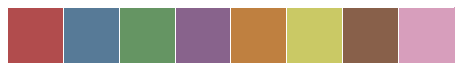

In [14]:
sns.palplot(sns.color_palette("Set1", n_colors=8, desat=.5))